In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sys
# Add the current directory to the system path
current = sys.path.append('.')

In [4]:
data_path = '/home/mahbubah_abdulhakim/'

In [5]:
performance_file = pd.read_csv(data_path+'Challenge_Data/performance_data.csv')

In [6]:
performance_file.head()

,game_id,preview_link,ER,CTR
0,bfbf7a2b7ac635e67877b1ab87fd6629,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.209269,0.058438
1,945010afbf9a55bbdffcb0895f946155,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.274552,0.074731
2,e68e20f592457b875ce29757ab855dfe,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.103688,0.042228
3,adunit-nestle-purina-friskies-mob,https://s3.ap-southeast-1.amazonaws.com/a.futu...,0.136963,0.005393
4,adunit-lionsgate-uwomt-user-slider-sensory-vid...,https://s3.us-west-1.amazonaws.com/a.futureadl...,0.114208,0.016443


Click-Through Rate (CTR) measures the percentage of people who see your ad and then click on it. It's calculated by dividing the number of clicks your ad receives by the number of times it's shown (impressions). CTR = (Clicks / Impressions) * 100%

Engagement Rate (ER) represents the projected average revenue earned from each user who installs your app through your ad campaign.Calculating ER can vary depending on the platform and available data. It often involves factors like in-app purchase data, subscription rates, and ad revenue models.

In [7]:
performance_file.describe()

,ER,CTR
count,905.000000,905.000000
mean,0.136318,0.034466
std,0.091524,0.036967
min,0.000000,0.000000
25%,0.070338,0.007926
50%,0.118624,0.024537
75%,0.190722,0.047796
max,0.524498,0.297410


A higher ER suggests a more targeted and profitable ad campaign, attracting users likely to generate income for your app. A lower ER might indicate poor targeting, attracting users who don't convert into paying customers.

In [8]:
print(f"The maximum Engagement Rate is {performance_file['ER'].max()}")
print(f"The minimum Engagement Rate is {performance_file['ER'].min()}")

The maximum Engagement Rate is 0.5244978411864089
The minimum Engagement Rate is 0.0


A higher CTR indicates a more engaging and relevant ad that effectively captures user attention and prompts them to take further action. A low CTR signifies an ad that might be poorly targeted, irrelevant, or visually unappealing.

In [9]:
print(f"The maximum Click Through Rate is {performance_file['CTR'].max()}")
print(f"The minimum Click Through Rate is {performance_file['CTR'].min()}")

The maximum Click Through Rate is 0.2974101921470342
The minimum Click Through Rate is 0.0


In [10]:
CTR = performance_file['CTR']
ER = performance_file['ER']

In [11]:
correlation = ER.corr(CTR)
print(f"Correlation between ER and CTR: {correlation:.2f}")

Correlation between ER and CTR: 0.45


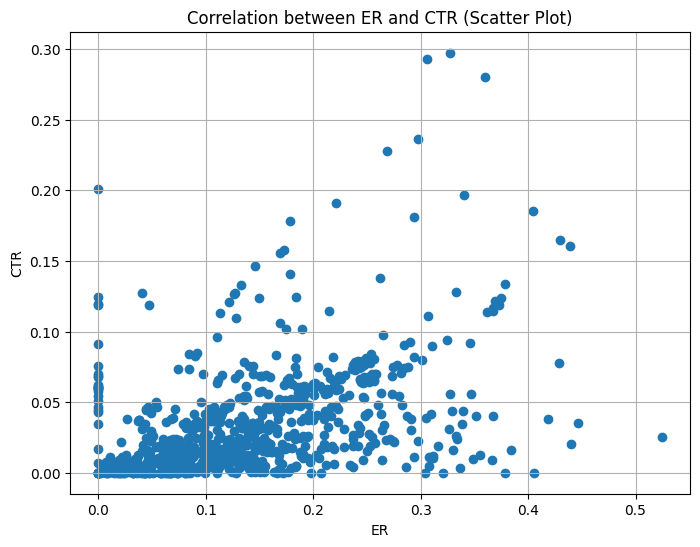

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(ER, CTR)
plt.xlabel('ER')
plt.ylabel('CTR')
plt.title('Correlation between ER and CTR (Scatter Plot)')
plt.grid(True)
plt.show()

The top 100 ER and CTR

In [13]:
#top 100 ads (ER and CTR scores)
top_100_ER = performance_file.nlargest(100, 'ER')

top_100_CTR = performance_file.nlargest(100, 'CTR')


In [14]:
top_100_CTR_ID =  top_100_CTR['game_id'].tolist()
top_100_ER_ID =  top_100_ER['game_id'].tolist()

In [15]:
from collections import Counter

counter1 = Counter(top_100_CTR_ID)
counter2 = Counter(top_100_ER_ID)

In [16]:
common_values = [ID for ID, count in counter1.items() if counter2[ID] == count]
print(common_values)

['6befe54086758294b47addf0c12052a7', 'f033db746b20e747ee528caa07f0b2de', 'eb641577b39bf60665e3130ac0d4e301', '79a672060e901ce418230c3959619cca', '77af46ea55c251a18213104bd760d1d2', 'adunit-vodacom-ciot-curve-v1-mob', 'adunit-mouser-user-choice-flight4-canada-cpe-mob', 'c823124ca76c00a9d3b79380e5bdfd29', '6a3dbf08b82e45b3f3e79844f3a9aa18', 'adunit-mouser-user-choice-flight4-uk-cpe-mob', 'adunit-scotch-brite-scrub-dots-sponge-tap-thai-mob', 'df91c37d7078b8b406deaea243bb3746', 'adunit-mouser-user-choice-v3-uk-cpe-mob', '3ff8db0779a25d3a9b92aebfb0eebe69', '7db3a9c286b1a445845bad68ff95f2bb', '3ba7994ec2ea0b953b57457bd25ac857', '034c0fa142311896c1b1b6900487d2fb', '0383071848070b93a8a9f0c82c06e5e4', '3c5828449ad87b05b5dedf0b4787242a', '251daf76d78711e74c9b441f4bb62834', '097b04b65ad1608a869f2fb08909a612', '03231e84227b5038d1ce9c302019da8c', 'bb8342d60fc04fb8c4fcfdbc3025f4d9', 'adunit-vodacom-ciot-curve-mob', 'adunit-the-botanist-gin-mob', '6d72ce3e20781f20fb420b30d3dd8b0e', '65299151bf4cbd182

In [17]:
len(common_values)

35